# Task 1

In [1]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    visited.add(start)
    while queue:
        vertex = queue.popleft()
        print(vertex, end=' ')
        for neighbor in graph[vertex]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

In [2]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    print(start, end=' ')
    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)

In [4]:
def bfs_tree(root):
    queue = [root]
    while queue:
        node = queue.pop(0)
        print(node.val, end=' ')
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)

In [5]:
def dfs_tree(root):
    if root:
        print(root.val, end=' ')
        dfs_tree(root.left)
        dfs_tree(root.right)

## BFS and DFS on Graph

In [6]:
graph = {
    1: [2, 3],
    2: [1, 4],
    3: [1, 4],
    4: [2, 3]
}

# BFS
print("BFS:", end=' ')
bfs(graph, 1)

# DFS
print("\nDFS:", end=' ')
dfs(graph, 1)


BFS: 1 2 3 4 
DFS: 1 2 4 3 

## BFS and DFS on Tree

In [7]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.left = TreeNode(6)
root.right.right = TreeNode(7)

# BFS
print("BFS:", end=' ')
bfs_tree(root)

# DFS
print("\nDFS:", end=' ')
dfs_tree(root)


BFS: 1 2 3 4 5 6 7 
DFS: 1 2 4 5 3 6 7 

# Task 2

In [16]:
import random
import time

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def generate_unique_numbers(range_start, range_end, count):
    if count > range_end - range_start:
        raise ValueError("count should be less than or equal to range_end - range_start")
    numbers = set()
    while len(numbers) < count:
        numbers.add(random.randint(range_start, range_end))
    return list(numbers)

def build_tree(numbers):
    if not numbers:
        return None
    mid = len(numbers) // 2
    root = TreeNode(numbers[mid])
    root.left = build_tree(numbers[:mid])
    root.right = build_tree(numbers[mid+1:])
    return root

def bfs_tree(root, goal):
    queue = deque([root])
    visited = set()
    visited.add(root.val)
    while queue:
        node = queue.popleft()
        if node.val == goal:
            return True
        if node.left and node.left.val not in visited:
            queue.append(node.left)
            visited.add(node.left.val)
        if node.right and node.right.val not in visited:
            queue.append(node.right)
            visited.add(node.right.val)
    return False

def dfs_tree(root, goal):
    visited = set()
    def dfs_helper(node):
        if node is None:
            return False
        if node.val == goal:
            return True
        visited.add(node.val)
        left_found = False
        right_found = False
        if node.left and node.left.val not in visited:
            left_found = dfs_helper(node.left)
        if node.right and node.right.val not in visited:
            right_found = dfs_helper(node.right)
        return left_found or right_found
    return dfs_helper(root)

ranges = [(1,1000),(1000, 40000), (40001, 80000), (80001, 200000), (200001, 1000000)]
sizes = [1000, 40000, 80000, 200000, 1000000]
total_len = sum(sizes)
goal = None
times=[]

for i, r in enumerate(ranges):
    goal_index = sizes[i] - 220
    numbers = generate_unique_numbers(0, r[1], sizes[i])
    root = build_tree(numbers)
    goal = numbers[goal_index]
    print(f"Set {i+1} with {sizes[i]} nodes:")
    
    start_time = time.time()
    bfs_found = bfs_tree(root, goal)
    bfs_time = time.time() - start_time
    print(f"BFS time: {bfs_time:.5f}s, found: {bfs_found}")
    
    start_time = time.time()
    dfs_found = dfs_tree(root, goal)
    dfs_time = time.time() - start_time
    print(f"DFS time: {dfs_time:.5f}s, found: {dfs_found}\n")
    
    times.append((bfs_time,dfs_time))

Set 1 with 1000 nodes:
BFS time: 0.00243s, found: True
DFS time: 0.00051s, found: True

Set 2 with 40000 nodes:
BFS time: 0.05102s, found: True
DFS time: 0.06641s, found: True

Set 3 with 80000 nodes:
BFS time: 0.10919s, found: True
DFS time: 0.10868s, found: True

Set 4 with 200000 nodes:
BFS time: 0.29807s, found: True
DFS time: 0.29647s, found: True

Set 5 with 1000000 nodes:
BFS time: 0.47420s, found: True
DFS time: 1.51020s, found: True



In [31]:
import pandas as pd
# Parsing inputs
dfs_t=[]
bfs_t=[]
for i,t in enumerate(times):
    bfs_t.append(t[0])
    dfs_t.append(t[1])
df = pd.DataFrame({'Tree Size': sizes, 'BFS Time': bfs_t, 'DFS Time': dfs_t})
print(df)

   Tree Size  BFS Time  DFS Time
0       1000  0.002428  0.000515
1      40000  0.051024  0.066413
2      80000  0.109186  0.108681
3     200000  0.298074  0.296471
4    1000000  0.474202  1.510200


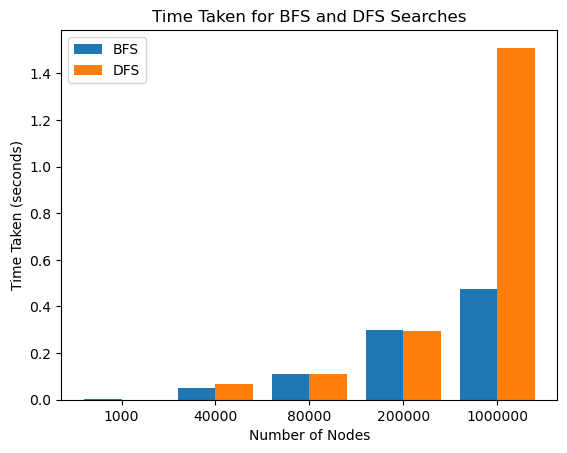

In [32]:
import matplotlib.pyplot as plt
import numpy as np

x_axis=np.arange(len(sizes))

# Plot bar chart
plt.bar(x_axis-0.2, bfs_t, 0.4, label='BFS')
plt.bar(x_axis+0.2, dfs_t, 0.4, label='DFS')

# Set chart title and axis labels
plt.xticks(x_axis,sizes)
plt.title('Time Taken for BFS and DFS Searches')
plt.xlabel('Number of Nodes')
plt.ylabel('Time Taken (seconds)')

# Add legend
plt.legend()

# Display chart
plt.show()


# Task 3


In [35]:
from binarytree import Node

# Create root node
root = Node(1)

# Add child nodes
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.right = Node(6)
root.left.left.left = Node(7)
root.left.left.right = Node(8)
root.right.right.left = Node(9)
root.right.right.right = Node(10)
root.right.right.left.left = Node(11)
root.right.right.left.right = Node(12)
root.right.right.right.right = Node(13)
root.right.right.right.right.left = Node(14)
root.right.right.right.right.left.left = Node(15)

# Print binary tree
print(root)



        __1
       /   \
    __2     3________
   /   \             \
  4     5          ___6
 / \              /    \
7   8           _9      10______
               /  \             \
              11   12           _13
                               /
                             _14
                            /
                           15



In [37]:
from anytree import Node, RenderTree

# Create root node
root = Node("1")

# Add child nodes
node2 = Node("2", parent=root)
node3 = Node("3", parent=root)
node4 = Node("4", parent=node2)
node5 = Node("5", parent=node2)
node6 = Node("6", parent=node3)
node7 = Node("7", parent=node4)
node8 = Node("8", parent=node4)
node9 = Node("9", parent=node6)
node10 = Node("10", parent=node6)
node11 = Node("11", parent=node9)
node12 = Node("12", parent=node9)
node13 = Node("13", parent=node10)
node14 = Node("14", parent=node13)
node15 = Node("15", parent=node14)

# Print binary tree
for pre, fill, node in RenderTree(root):
    print("%s%s" % (pre, node.name))


1
├── 2
│   ├── 4
│   │   ├── 7
│   │   └── 8
│   └── 5
└── 3
    └── 6
        ├── 9
        │   ├── 11
        │   └── 12
        └── 10
            └── 13
                └── 14
                    └── 15


In [38]:
from treelib import Node, Tree

# Create tree and add root node
tree = Tree()
tree.create_node("1", "1") 

# Add child nodes
tree.create_node("2", "2", parent="1")
tree.create_node("3", "3", parent="1")
tree.create_node("4", "4", parent="2")
tree.create_node("5", "5", parent="2")
tree.create_node("6", "6", parent="3")
tree.create_node("7", "7", parent="4")
tree.create_node("8", "8", parent="4")
tree.create_node("9", "9", parent="6")
tree.create_node("10", "10", parent="6")
tree.create_node("11", "11", parent="9")
tree.create_node("12", "12", parent="9")
tree.create_node("13", "13", parent="10")
tree.create_node("14", "14", parent="13")
tree.create_node("15", "15", parent="14")

# Display tree
tree.show()


1
├── 2
│   ├── 4
│   │   ├── 7
│   │   └── 8
│   └── 5
└── 3
    └── 6
        ├── 10
        │   └── 13
        │       └── 14
        │           └── 15
        └── 9
            ├── 11
            └── 12



In [41]:
from graphviz import Digraph

# Create graph
dot = Digraph()

# Add nodes
dot.node("1", "1")
dot.node("2", "2")
dot.node("3", "3")
dot.node("4", "4")
dot.node("5", "5")
dot.node("6", "6")
dot.node("7", "7")
dot.node("8", "8")
dot.node("9", "9")
dot.node("10", "10")
dot.node("11", "11")
dot.node("12", "12")
dot.node("13", "13")
dot.node("14", "14")
dot.node("15", "15")

# Add edges
dot.edge("1", "2")
dot.edge("1", "3")
dot.edge("2", "4")
dot.edge("2", "5")
dot.edge("3", "6")
dot.edge("4", "7")
dot.edge("4", "8")
dot.edge("6", "9")
dot.edge("6", "10")
dot.edge("9", "11")
dot.edge("9", "12")
dot.edge("10", "13")
dot.edge("13", "14")
dot.edge("14", "15")

# Render graph
dot.render("binary_tree", format="png", view=True)

'binary_tree.png'

In [42]:
import turtle

# Define a function to draw a binary tree recursively
def draw_tree(t, level, x, y):
    if level > 0:
        # Draw left child
        t.penup()
        t.goto(x, y)
        t.pendown()
        t.goto(x - 100/(2**level), y - 50)
        draw_tree(t, level - 1, x - 100/(2**level), y - 50)
        
        # Draw right child
        t.penup()
        t.goto(x, y)
        t.pendown()
        t.goto(x + 100/(2**level), y - 50)
        draw_tree(t, level - 1, x + 100/(2**level), y - 50)
    
    # Draw node
    t.penup()
    t.goto(x, y)
    t.pendown()
    t.circle(20)
    t.write(str(level), align="center", font=("Arial", 12, "normal"))

# Create turtle object
t = turtle.Turtle()

# Set turtle properties
t.speed(0)
turtle.bgcolor("white")
t.color("black")

# Draw tree
draw_tree(t, 4, 0, 200)

# Exit on click
turtle.exitonclick()

# Task 4

In [47]:
from queue import PriorityQueue

# Graph representation as dictionary
graph = {
    'S': [('A', 2), ('B', 1)],
    'A': [('S', 2), ('B', 2), ('C', 3)],
    'B': [('S', 1), ('A', 2), ('D', 4)],
    'C': [('A', 3), ('D', 2)],
    'D': [('B', 4), ('C', 2), ('E', 3)],
    'E': [('D', 3)]
}

def ucs(start, goal):
    frontier = PriorityQueue()
    frontier.put((0, start))
    explored = set()
    path = {}
    cost = {}
    path[start] = None
    cost[start] = 0
    
    while not frontier.empty():
        current_cost, current_node = frontier.get()
        
        if current_node == goal:
            # Goal found, backtrack to find path
            p = []
            while current_node is not None:
                p.append(current_node)
                current_node = path[current_node]
            return p[::-1]
        
        explored.add(current_node)
        
        for neighbor, neighbor_cost in graph[current_node]:
            if neighbor not in explored and neighbor not in cost or cost[current_node] + neighbor_cost < cost[neighbor]:
                cost[neighbor] = cost[current_node] + neighbor_cost
                priority = cost[neighbor]
                frontier.put((priority, neighbor))
                path[neighbor] = current_node
    
    # Goal not found
    return None

# Example usage
path = ucs('S', 'E')
print(path)


['S', 'B', 'D', 'E']


In [48]:
graph = {
    1: [(2,1), (3,1)],
    2: [(1,1), (4,1)],
    3: [(1,1), (4,1)],
    4: [(2,1), (3,1)]
}
path = ucs(1,4)
print(path)

[1, 2, 4]


In [55]:
from queue import PriorityQueue

graph = {
    'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
    'Zerind': {'Arad': 75, 'Oradea': 71},
    'Oradea': {'Zerind': 71, 'Sibiu': 151},
    'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu': 80},
    'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
    'Rimnicu': {'Sibiu': 80, 'Pitesti': 97, 'Craiova': 146},
    'Timisoara': {'Arad': 118, 'Lugoj': 111},
    'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
    'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
    'Drobeta': {'Mehadia': 75, 'Craiova': 120},
    'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
    'Pitesti': {'Craiova': 138, 'Rimnicu': 97, 'Bucharest': 101},
    'Bucharest': {'Fagaras': 211, 'Pitesti': 101, 'Giurgiu': 90, 'Urziceni': 85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Hirsova': 98, 'Vaslui': 142},
    'Hirsova': {'Urziceni': 98, 'Eforie': 86},
    'Eforie': {'Hirsova': 86},
    'Vaslui': {'Urziceni': 142, 'Iasi': 92},
    'Iasi': {'Vaslui': 92, 'Neamt': 87},
    'Neamt': {'Iasi': 87}
}

def ucs(graph, start, goal):
    frontier = PriorityQueue()
    frontier.put((0, start))  # put starting node in the frontier with a cost of 0
    came_from = {}  # to keep track of the path
    cost_so_far = {}  # to keep track of the cost to reach each node
    came_from[start] = None
    cost_so_far[start] = 0
    
    while not frontier.empty():
        current = frontier.get()[1]  # get node with the lowest cost from the frontier
        
        if current == goal:  # if goal node is reached, return the path
            path = []
            while current != start:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path, cost_so_far[goal]
        
        # explore the neighbors of the current node
        for neighbor, cost in graph[current].items():
            new_cost = cost_so_far[current] + cost
            
            # if neighbor is not yet explored or the new path has a lower cost
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost
                frontier.put((priority, neighbor))
                came_from[neighbor] = current
    
    # if goal node is not reachable from start node, return None
    return None


# Define the start and goal nodes
start_node = 'Arad'
goal_node = 'Bucharest'

# Find the minimum path using UCS
path, total_cost = ucs(graph, start_node, goal_node)

# Print the minimum path and total cost
print("Minimum path:", path)
print("Total cost:", total_cost)

Minimum path: ['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']
Total cost: 418


# Task 5 

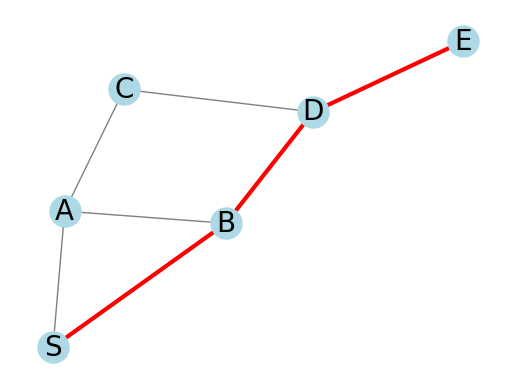

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

# define the graph
graph = {
    'S': {'A':2, 'B':1},
    'A': {'S':2, 'B':2, 'C':3},
    'B': {'S':1, 'A':2, 'D':4},
    'C': {'A':3, 'D':2},
    'D': {'B':4, 'C':2, 'E':3},
    'E': {'D':3}
}

# define the start and goal nodes
start = 'S'
goal = 'E'

# define the UCS function
def ucs(graph, start, goal):
    # initialize the queue with the start node and its cost
    queue = [(start, 0)]
    # initialize the visited set
    visited = set()
    # initialize the parent dictionary to keep track of the path
    parent = {start: None}
    
    while queue:
        # get the node with the lowest cost from the queue
        node, cost = sorted(queue, key=lambda x: x[1])[0]
        queue.remove((node, cost))
        
        # check if we have reached the goal node
        if node == goal:
            path = []
            while node is not None:
                path.append(node)
                node = parent[node]
            return path[::-1]
        
        # mark the node as visited
        visited.add(node)
        
        # expand the node
        for neighbor, neighbor_cost in graph[node].items():
            # calculate the new cost to get to the neighbor node
            new_cost = cost + neighbor_cost
            # check if we have visited the neighbor node before
            if neighbor not in visited:
                # check if the neighbor node is already in the queue
                for i, (queue_node, queue_cost) in enumerate(queue):
                    if queue_node == neighbor:
                        # update the cost if the new cost is lower than the old cost
                        if new_cost < queue_cost:
                            queue[i] = (neighbor, new_cost)
                            parent[neighbor] = node
                        break
                else:
                    # add the neighbor node to the queue
                    queue.append((neighbor, new_cost))
                    parent[neighbor] = node
    
    return None

# run the UCS algorithm
path = ucs(graph, start, goal)

# visualize the graph and the path
G = nx.Graph()
G.add_edges_from([(a, b, {'weight': w}) for a in graph for b, w in graph[a].items()])
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
if path is not None:
    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)
plt.axis('off')
plt.show()

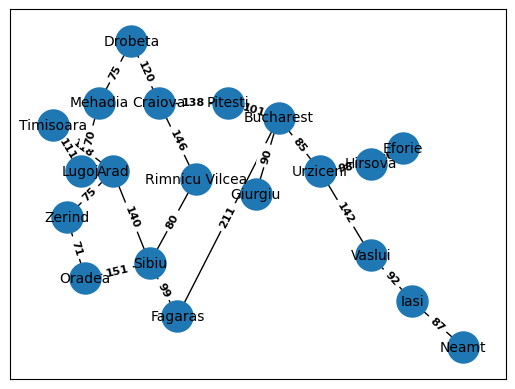

In [59]:
import networkx as nx
import matplotlib.pyplot as plt

# Define nodes
nodes = ['Arad', 'Zerind', 'Oradea', 'Sibiu', 'Timisoara', 'Lugoj', 'Mehadia', 
         'Drobeta', 'Craiova', 'Rimnicu Vilcea', 'Pitesti', 'Fagaras', 'Bucharest', 
         'Giurgiu', 'Urziceni', 'Hirsova', 'Eforie']

# Define edges
edges = [('Arad', 'Zerind', 75), ('Arad', 'Sibiu', 140), ('Arad', 'Timisoara', 118),
         ('Zerind', 'Oradea', 71), ('Oradea', 'Sibiu', 151), ('Timisoara', 'Lugoj', 111),
         ('Lugoj', 'Mehadia', 70), ('Mehadia', 'Drobeta', 75), ('Drobeta', 'Craiova', 120),
         ('Craiova', 'Rimnicu Vilcea', 146), ('Craiova', 'Pitesti', 138), ('Rimnicu Vilcea', 'Sibiu', 80),
         ('Pitesti', 'Bucharest', 101), ('Fagaras', 'Sibiu', 99), ('Fagaras', 'Bucharest', 211),
         ('Bucharest', 'Giurgiu', 90), ('Bucharest', 'Urziceni', 85), ('Urziceni', 'Hirsova', 98),
         ('Hirsova', 'Eforie', 86), ('Urziceni', 'Vaslui', 142), ('Vaslui', 'Iasi', 92),
         ('Iasi', 'Neamt', 87)]

# Define positions for nodes
pos = {'Arad': (180, 520), 'Zerind': (80, 460), 'Oradea': (120, 380), 'Sibiu': (260, 400),
       'Timisoara': (50, 580), 'Lugoj': (110, 520), 'Mehadia': (150, 610), 'Drobeta': (220, 690),
       'Craiova': (280, 610), 'Rimnicu Vilcea': (360, 510), 'Pitesti': (430, 610), 'Fagaras': (320, 330),
       'Bucharest': (540, 590), 'Giurgiu': (490, 490), 'Urziceni': (630, 520), 'Hirsova': (740, 530),
       'Eforie': (810, 550), 'Vaslui': (740, 410), 'Iasi': (830, 350), 'Neamt': (940, 290)}

# Create graph object
G = nx.Graph()

# Add nodes to the graph
for node in nodes:
    G.add_node(node)

# Add edges to the graph
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Draw the graph
nx.draw_networkx(G, pos, with_labels=True, font_size=10, node_size=500)

# Draw edge labels
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8, font_weight='bold')

# Show graph
plt.show()

# Task 6

In [67]:
from queue import Queue, PriorityQueue
from copy import deepcopy

# Check if a queen can be placed at position (row, col)
def is_valid(board, row, col):
    for i in range(row):
        if board[i] == col or \
           board[i] - i == col - row or \
           board[i] + i == col + row:
            return False
    return True

# BFS implementation
def bfs(n):
    q = Queue()
    q.put([])
    while not q.empty():
        board = q.get()
        if len(board) == n:
            return board
        for i in range(n):
            if is_valid(board, len(board), i):
                q.put(board + [i])

# UCS implementation
def ucs(n):
    pq = PriorityQueue()
    pq.put((0, []))
    while not pq.empty():
        cost, board = pq.get()
        if len(board) == n:
            return board
        for i in range(n):
            if is_valid(board, len(board), i):
                new_board = deepcopy(board)
                new_board.append(i)
                pq.put((cost + 1, new_board))

# Test the algorithms
n = 8
bfs_solution = bfs(n)
ucs_solution = ucs(n)
print("BFS Solution: ", bfs_solution)
print("UCS Solution: ", ucs_solution)


BFS Solution:  [0, 4, 7, 5, 2, 6, 1, 3]
UCS Solution:  [0, 4, 7, 5, 2, 6, 1, 3]
